In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("../data/reviews_raw.csv")

df.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [11]:
print("Shape:", df.shape)
df.columns


Shape: (71044, 25)


Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

In [12]:
df_small = df[['brand','categories','name','reviews.rating','reviews.text']].copy()
df_small.head()


,brand,categories,name,reviews.rating,reviews.text
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...


In [13]:
df_small.isna().sum()


brand              0
categories         0
name               0
reviews.rating     0
reviews.text      36
dtype: int64

In [14]:
import re

def clean_text(text):
    if pd.isna(text): return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9 ]',' ',text)
    return " ".join(text.split())


In [15]:
df_small['clean_text'] = df_small['reviews.text'].apply(clean_text)
df_small.head()


,brand,categories,name,reviews.rating,reviews.text,clean_text
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,i love this album it s very good more to the h...
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,good flavor this review was collected as part ...
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,good flavor
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,i read through the reviews on here before look...
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,my husband bought this gel for us the gel caus...


In [16]:
def rating_to_sentiment(r):
    if r >= 4: return "Positive"
    elif r == 3: return "Neutral"
    else: return "Negative"

df_small['sentiment'] = df_small['reviews.rating'].apply(rating_to_sentiment)
df_small.head()


,brand,categories,name,reviews.rating,reviews.text,clean_text,sentiment
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,i love this album it s very good more to the h...,Positive
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,good flavor this review was collected as part ...,Positive
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,good flavor,Positive
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,i read through the reviews on here before look...,Negative
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,my husband bought this gel for us the gel caus...,Negative


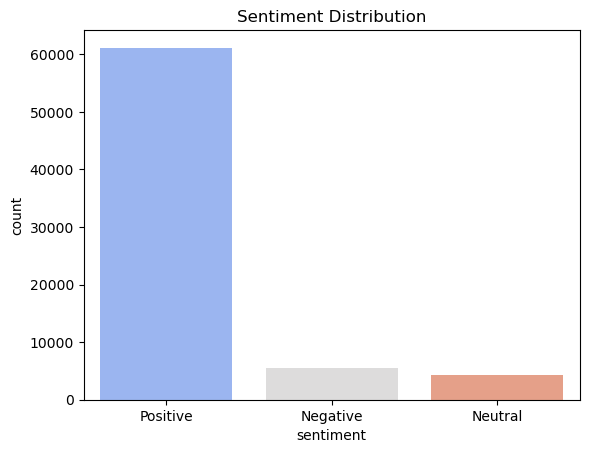

In [17]:
sns.countplot(x=df_small['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()


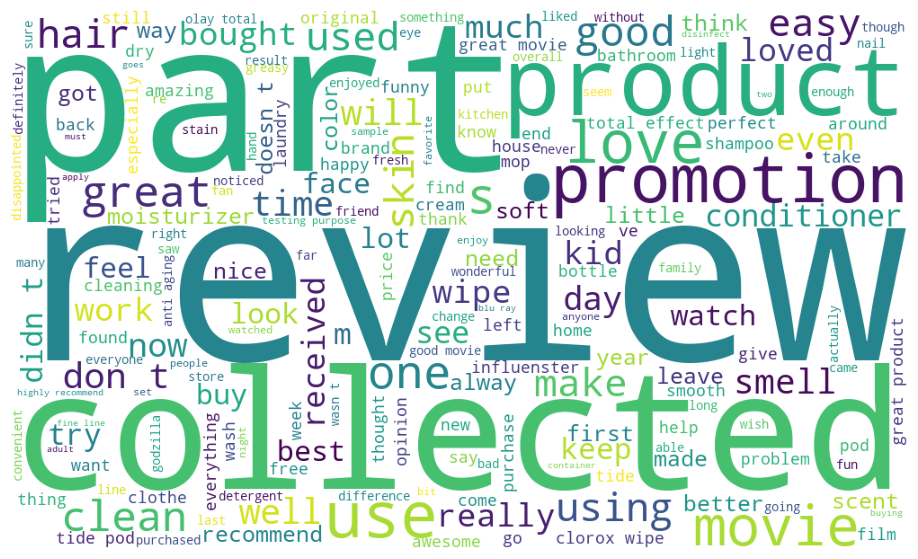

In [18]:
wc = WordCloud(width=1000, height=600, background_color='white').generate(" ".join(df_small['clean_text']))
plt.figure(figsize=(12,7))
plt.imshow(wc)
plt.axis("off")
plt.show()


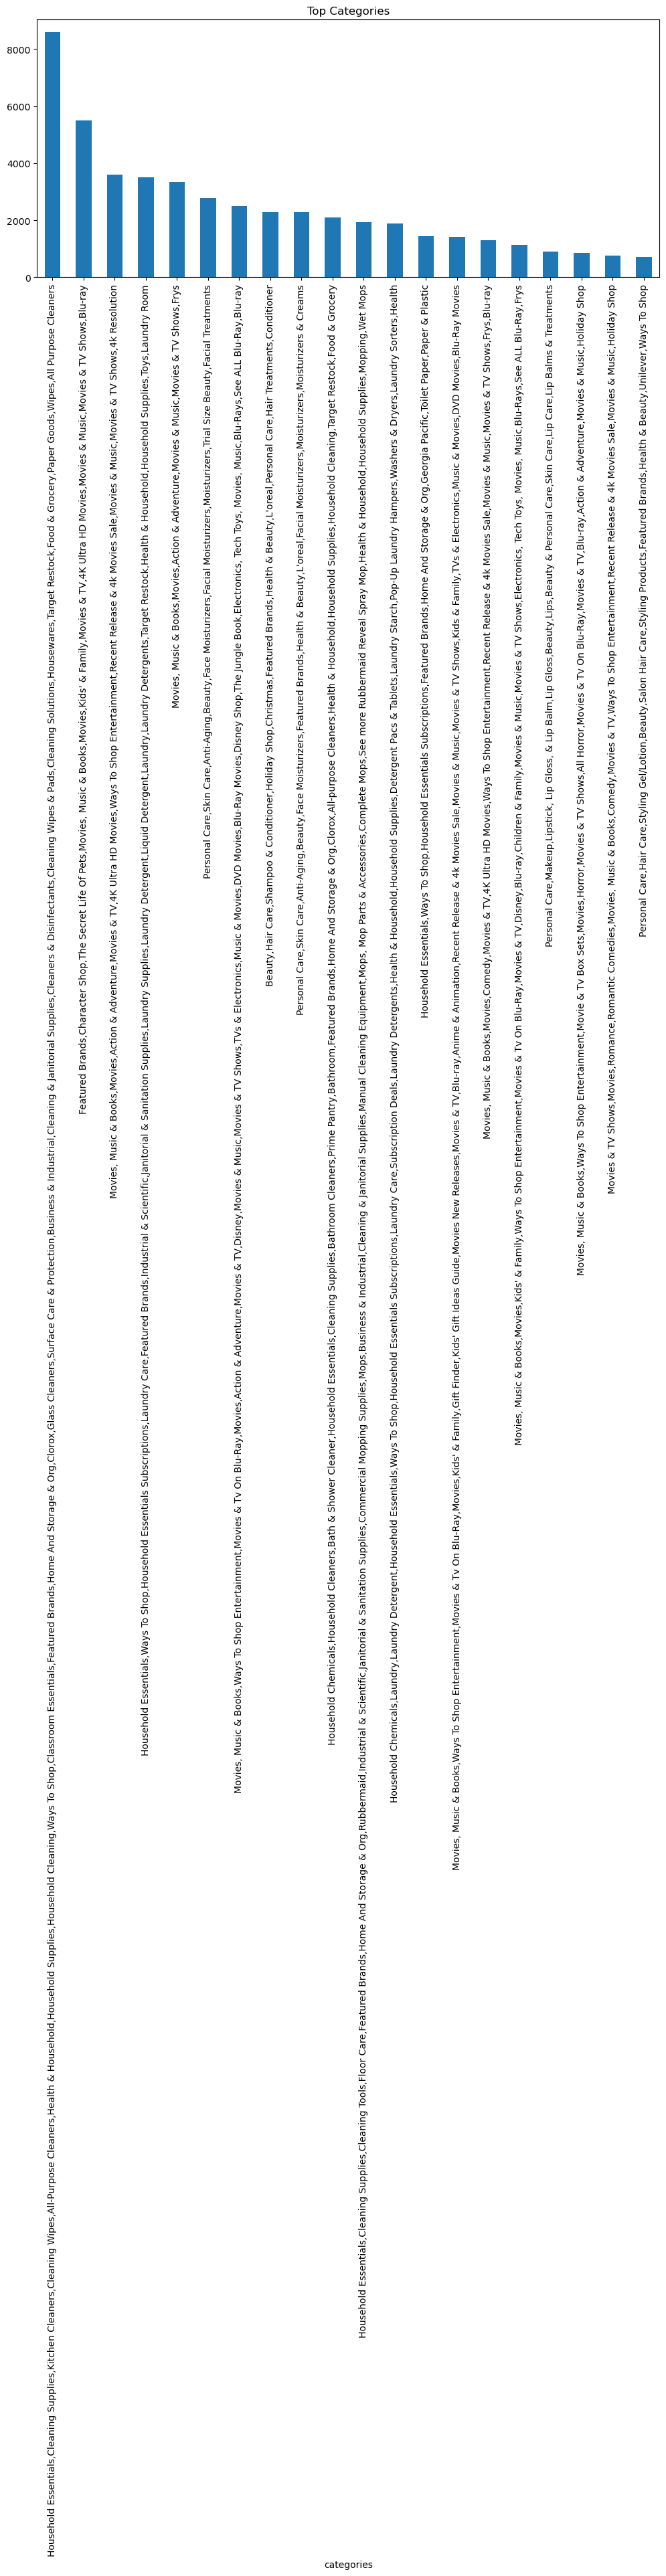

In [19]:
df_small['categories'].value_counts().head(20).plot(kind='bar', figsize=(12,5))
plt.title("Top Categories")
plt.show()


In [20]:
df_small['combined'] = df_small['name'].astype(str) + " " + df_small['clean_text']
df_small.head()


,brand,categories,name,reviews.rating,reviews.text,clean_text,sentiment,combined
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,i love this album it s very good more to the h...,Positive,Pink Friday: Roman Reloaded Re-Up (w/dvd) i lo...
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,good flavor this review was collected as part ...,Positive,Lundberg Organic Cinnamon Toast Rice Cakes goo...
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,good flavor,Positive,Lundberg Organic Cinnamon Toast Rice Cakes goo...
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,i read through the reviews on here before look...,Negative,K-Y Love Sensuality Pleasure Gel i read throug...
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,my husband bought this gel for us the gel caus...,Negative,K-Y Love Sensuality Pleasure Gel my husband bo...


In [21]:
tfidf = TfidfVectorizer(max_features=20000, stop_words='english')
X = tfidf.fit_transform(df_small['combined'])

X.shape


(71044, 20000)

In [22]:
joblib.dump(tfidf, "../models/vectorizer.pkl")
joblib.dump(X, "../models/tfidf_matrix.pkl")


['../models/tfidf_matrix.pkl']

In [23]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(X)

joblib.dump(knn, "../models/knn.pkl")


['../models/knn.pkl']

In [24]:
def recommend(index, n=5):
    distances, indices = knn.kneighbors(X[index], n_neighbors=n+1)
    return df_small.iloc[indices[0][1:]][['name','brand','categories','reviews.rating','sentiment']]


In [25]:
recommend(10)


,name,brand,categories,reviews.rating,sentiment
7,K-Y Love Sensuality Pleasure Gel,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",1,Negative
23,K-Y Love Sensuality Pleasure Gel,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",5,Positive
4,K-Y Love Sensuality Pleasure Gel,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",1,Negative
24,K-Y Love Sensuality Pleasure Gel,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",5,Positive
29,K-Y Love Sensuality Pleasure Gel,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",5,Positive


In [26]:
df_small.to_csv("../data/processed.csv", index=False)
df_small.head()


,brand,categories,name,reviews.rating,reviews.text,clean_text,sentiment,combined
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,i love this album it s very good more to the h...,Positive,Pink Friday: Roman Reloaded Re-Up (w/dvd) i lo...
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,good flavor this review was collected as part ...,Positive,Lundberg Organic Cinnamon Toast Rice Cakes goo...
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,good flavor,Positive,Lundberg Organic Cinnamon Toast Rice Cakes goo...
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,i read through the reviews on here before look...,Negative,K-Y Love Sensuality Pleasure Gel i read throug...
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,my husband bought this gel for us the gel caus...,Negative,K-Y Love Sensuality Pleasure Gel my husband bo...


In [27]:
df_small.groupby("brand")['sentiment'].value_counts().unstack().fillna(0)


sentiment,Negative,Neutral,Positive
brand,,,
4C Foods,0.0,0.0,6.0
AMBI,0.0,0.0,4.0
ANCHOR BAY,0.0,1.0,29.0
Adesso,0.0,0.0,2.0
Advantage,0.0,0.0,3.0
...,...,...,...
Yes to Grapefruit,6.0,6.0,27.0
Yosemite Home Decor,1.0,0.0,0.0
Zyliss,4.0,2.0,53.0


In [29]:
print("Notebook Completed!")
print("Model, Vectorizer & KNN saved for API usage.")


Notebook Completed!
Model, Vectorizer & KNN saved for API usage.


In [31]:
from sklearn.model_selection import train_test_split

X = df_small['clean_text']
y = df_small['sentiment']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_ml = TfidfVectorizer(max_features=20000, stop_words='english')

X_vec = tfidf_ml.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=150)
}

accuracies = {}
trained_models = {}

print("Training multiple algorithms...\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    trained_models[name] = model
    print(f"{name}: {acc}")

best_model_name = max(accuracies, key=accuracies.get)
best_model = trained_models[best_model_name]




Training multiple algorithms...

Logistic Regression: 0.9027377014568232
SVM: 0.9063269758603701
Naive Bayes: 0.8812020550355408
Random Forest: 0.9059750862129636

Best Model: SVM
Accuracy: 0.9063269758603701


In [34]:
print("\nBest Model:", best_model_name)
print("Accuracy:", accuracies[best_model_name])



Best Model: SVM
Accuracy: 0.9063269758603701


In [41]:
joblib.dump(best_model, "../models/sentiment_model.pkl")
joblib.dump(tfidf_ml, "../models/vectorizer_ml.pkl")

print(f"Saved best model: {best_model_name}")


Saved best model: SVM


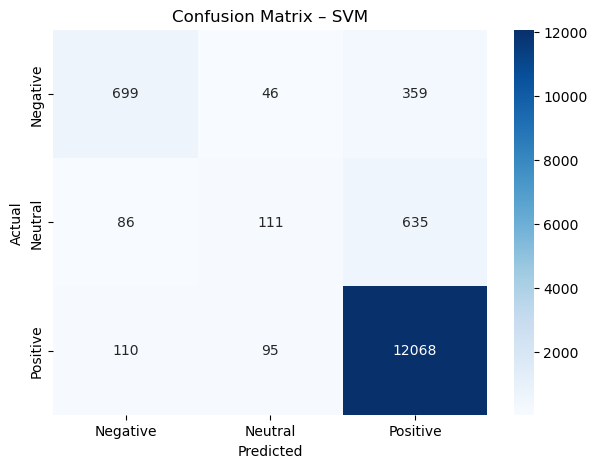

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=["Negative","Neutral","Positive"])

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=["Negative","Neutral","Positive"],
            yticklabels=["Negative","Neutral","Positive"])
plt.title(f"Confusion Matrix – {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


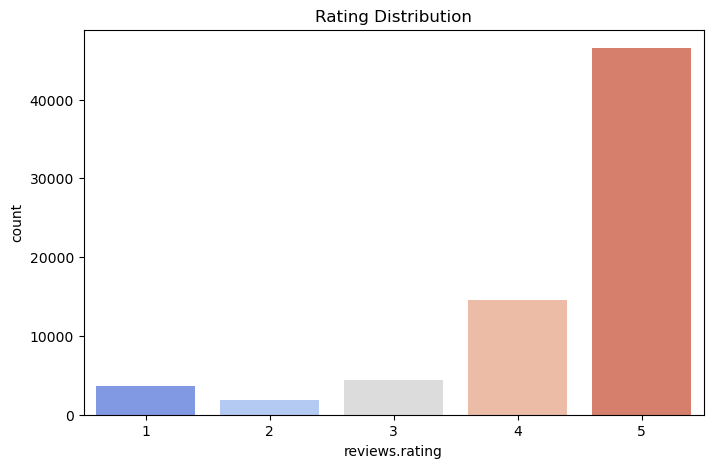

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_small['reviews.rating'], palette='coolwarm')
plt.title("Rating Distribution")
plt.show()


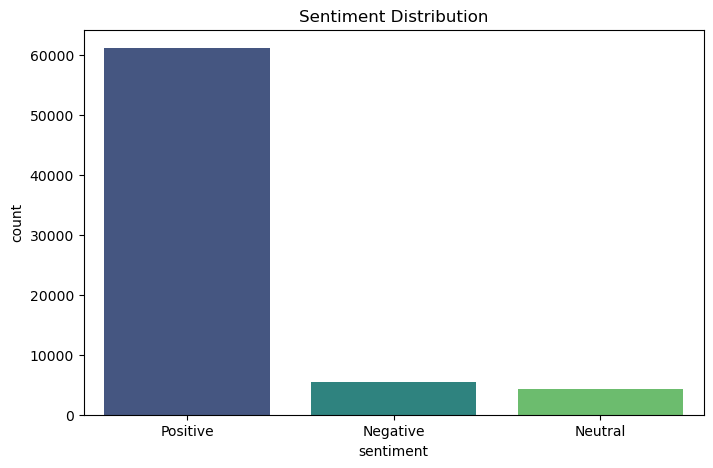

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_small['sentiment'], palette='viridis')
plt.title("Sentiment Distribution")
plt.show()


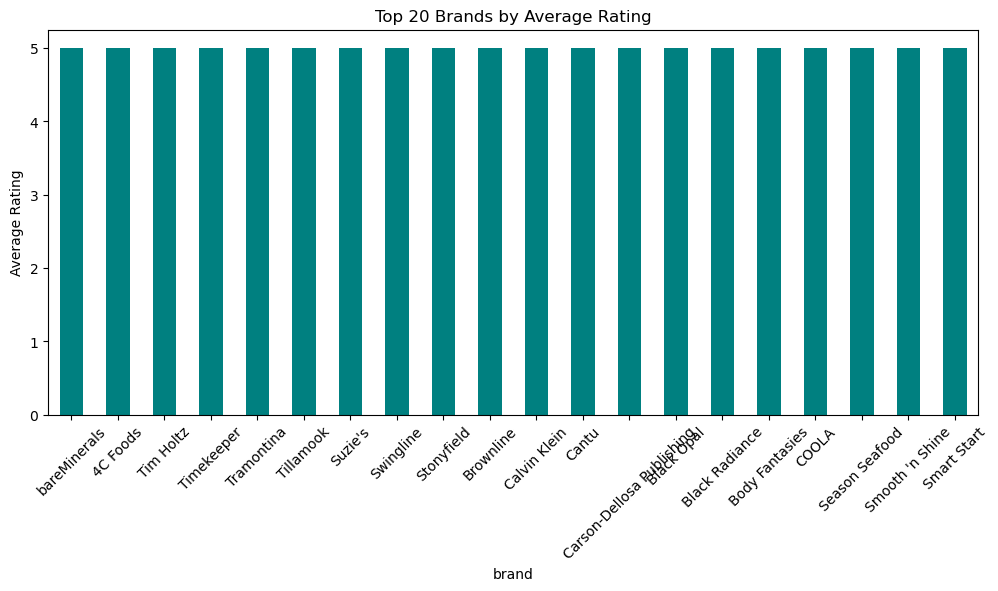

In [38]:
brand_rating = df_small.groupby("brand")['reviews.rating'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,5))
brand_rating.plot(kind='bar', color='teal')
plt.title("Top 20 Brands by Average Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


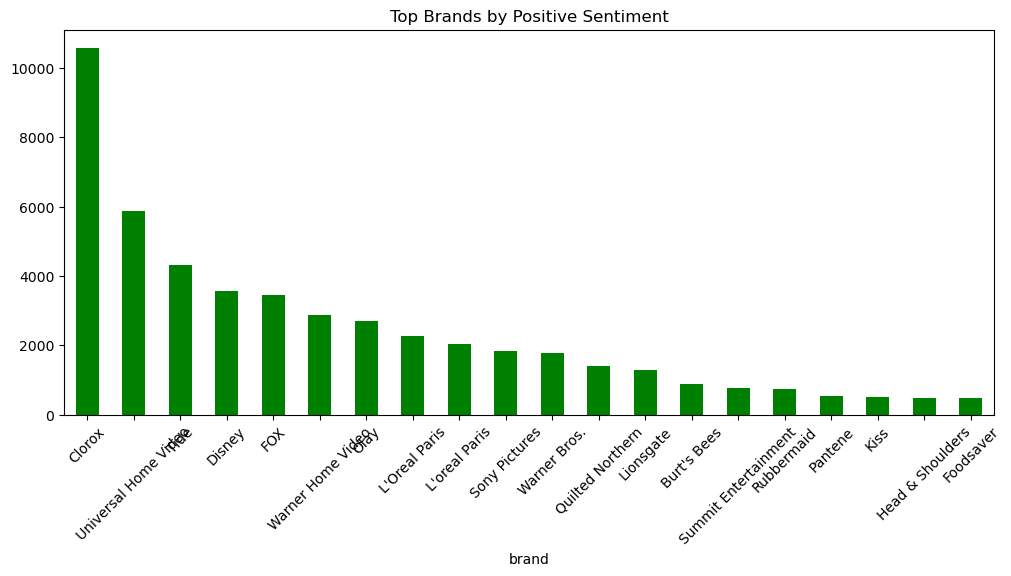

In [39]:
brand_sent = df_small[df_small['sentiment']=="Positive"]['brand'].value_counts().head(20)

plt.figure(figsize=(12,5))
brand_sent.plot(kind='bar', color='green')
plt.title("Top Brands by Positive Sentiment")
plt.xticks(rotation=45)
plt.show()


In [40]:
import joblib

joblib.dump(best_model, "../models/sentiment_model.pkl")
joblib.dump(tfidf_ml, "../models/vectorizer_ml.pkl")

print("Best model saved:", best_model_name)


Best model saved: SVM
